### Student Information
Name: 蔡秉翰

Student ID: 107064527

GitHub ID: k52276hank

---

### Instructions

2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

# Part 2: Take Home Exercise With New Dataset

## Package import & Prepare Dataset 

In [1]:
# magic command 
%load_ext autoreload
%autoreload 2

# package import 
import pandas as pd
import numpy as np
import nltk
import math

from helpers import data_mining_helpers as dmh

# Prepare Dateset
list_source = ["imdb", "amazon_cells", "yelp"]
dict_df = {}
data_all = pd.DataFrame(columns=["text","score", "source"])

for i, source in enumerate(list_source):
    df_input = pd.read_table('sentiment labelled sentences/{}_labelled.txt'.format(source),  header=None, names=["text", "score"])
    dict_df[source] = df_input # data store respectively
    df_input["source"] = [source]*df_input.shape[0] # add column source to df_input
    data_all = data_all.append(df_input, ignore_index=True) # data store together 

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# Number of Setence and Word
for source in list_source:
    print("In Dataset: {0}\tSentence: {1}\tWord: {2}".format(
        source, 
        len(dict_df[source]), 
        sum([len(setence.split(' ')) for setence in dict_df[source].text])))

In Dataset: imdb	Sentence: 748	Word: 16102
In Dataset: amazon_cells	Sentence: 1000	Word: 10246
In Dataset: yelp	Sentence: 1000	Word: 10894


In [3]:
# because we lose some data when use pandas to load imdb_labelled.txt, 
# we load the file by traditional method and transform to DataFrame.
list_text_imdb = []
list_score_imdb = []
with open("sentiment labelled sentences/imdb_labelled.txt", mode="r") as f:
    for line in f.readlines():
        each_text, each_score = line.strip().split('\t')
        
        list_text_imdb.append(each_text)
        list_score_imdb.append(each_score)

df_imdb = pd.DataFrame(
    data={
        "text":list_text_imdb, 
        "score":list_score_imdb, 
        "source":["imdb"]*len(list_text_imdb)})
dict_df["imdb"] = df_imdb
data_all.drop(data_all[data_all.source=="imdb"].index, inplace=True)
data_all = data_all.append(df_imdb, ignore_index=True)

In [4]:
# Number of Setence and Word
print("All Setence: {}".format(data_all.shape[0]))
for source in list_source:
    print("In Dataset: {0}\tSentence: {1}\tWord: {2}".format(
        source, 
        len(dict_df[source]), 
        sum([len(setence.split(' ')) for setence in dict_df[source].text])))

All Setence: 3000
In Dataset: imdb	Sentence: 1000	Word: 16354
In Dataset: amazon_cells	Sentence: 1000	Word: 10246
In Dataset: yelp	Sentence: 1000	Word: 10894


In [5]:
data_all.loc[3:10]

,text,score,source
3,Tied to charger for conversations lasting more...,0,amazon_cells
4,The mic is great.,1,amazon_cells
5,I have to jiggle the plug to get it to line up...,0,amazon_cells
6,If you have several dozen or several hundred c...,0,amazon_cells
7,If you are Razr owner...you must have this!,1,amazon_cells
8,"Needless to say, I wasted my money.",0,amazon_cells
9,What a waste of money and time!.,0,amazon_cells
10,And the sound quality is great.,1,amazon_cells


In [6]:
data_all.loc[[3,7,10], :]

,text,score,source
3,Tied to charger for conversations lasting more...,0,amazon_cells
7,If you are Razr owner...you must have this!,1,amazon_cells
10,And the sound quality is great.,1,amazon_cells


In [7]:
data_all.loc[lambda series: series.source=="amazon_cells", :][:9]

,text,score,source
0,So there is no way for me to plug it in here i...,0,amazon_cells
1,"Good case, Excellent value.",1,amazon_cells
2,Great for the jawbone.,1,amazon_cells
3,Tied to charger for conversations lasting more...,0,amazon_cells
4,The mic is great.,1,amazon_cells
5,I have to jiggle the plug to get it to line up...,0,amazon_cells
6,If you have several dozen or several hundred c...,0,amazon_cells
7,If you are Razr owner...you must have this!,1,amazon_cells
8,"Needless to say, I wasted my money.",0,amazon_cells


In [8]:
data_all.loc[:, ["text", "source"]].loc[::10][:5]

,text,source
0,So there is no way for me to plug it in here i...,amazon_cells
10,And the sound quality is great.,amazon_cells
20,I went on Motorola's website and followed all ...,amazon_cells
30,"This is a simple little phone to use, but the ...",amazon_cells
40,"It has a great camera thats 2MP, and the pics ...",amazon_cells


#### > Missing Values

In [9]:
# Calculate Null in all data
data_all.isnull().apply(lambda bool_null_each_row: sum([1 for bool_null in bool_null_each_row if bool_null==True]))

text      0
score     0
source    0
dtype: int64

#### > Duplicate Data

In [10]:
sum(data_all.duplicated())

17

In [11]:
data_all[data_all.duplicated(keep=False)]

,text,score,source
18,Works great!.,1,amazon_cells
179,If you like a loud buzzing to override all you...,0,amazon_cells
180,Don't buy this product.,0,amazon_cells
187,Great phone!.,1,amazon_cells
262,Works great.,1,amazon_cells
285,Great phone!.,1,amazon_cells
290,Great Phone.,1,amazon_cells
392,This is a great deal.,1,amazon_cells
402,Excellent product for the price.,1,amazon_cells
407,Works great.,1,amazon_cells


#### >> remove duplicate and reset the indices

In [12]:
data_all.drop_duplicates(keep='first', inplace=True)
data_all = data_all.reset_index(drop=True)

#### >> check duplicate again

In [13]:
sum(data_all.duplicated())

0

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [14]:
data_all_sample = data_all.sample(n=1000) #random state
print(len(data_all_sample))
for source in list_source:
    print("The amount of {0}: {1}.".format(
        source, 
        len(data_all_sample[lambda series: series.source==source])))
data_all_sample[0:10]

1000
The amount of imdb: 336.
The amount of amazon_cells: 321.
The amount of yelp: 343.


,text,score,source
2450,The only thing worse than Taylor's acting was ...,0,imdb
1562,Waited and waited and waited.,0,yelp
2341,I must say I have taped most of the episodes a...,1,imdb
1631,I'm not eating here!,0,yelp
349,Were JERKS on the phone.,0,amazon_cells
2032,The story itself is just predictable and lazy.,0,imdb
2687,"The results, well, are a shame.",0,imdb
937,"Otherwise, easy to install and use, clear sound.",1,amazon_cells
2064,Alexander Nevsky is a great film.,1,imdb
592,Piece of trash.,0,amazon_cells


1. The index is not arrage in order; therefore, sampling is randomly.
2. Original X compares to Sample X, the amount of data is decreasing to the n which I set in sample function.
3. previous X compares to sample X, the amount of same categories are almost similar. 

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [15]:
# import package
import matplotlib.pyplot as plt
%matplotlib inline

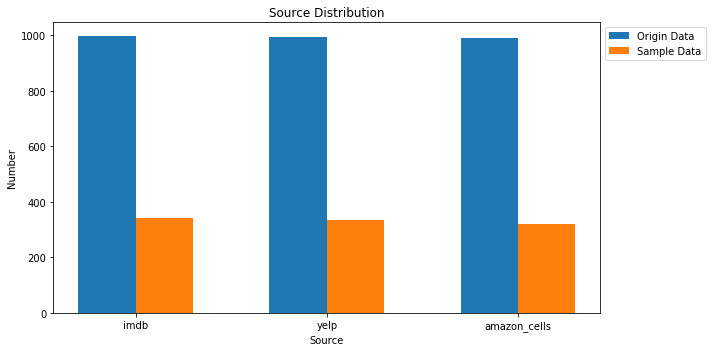

In [16]:
num_groups = len(data_all.source.value_counts())

# data 
origin_data = data_all.source.value_counts().values
sample_data = data_all_sample.source.value_counts().values

# figure setting
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(num_groups)
bar_width = 0.3

# chart plot
rects_origin = ax.bar(index, 
                      origin_data, 
                      bar_width,
                      label='Origin Data')

rects_sample = ax.bar(index+bar_width, 
                      sample_data, 
                      bar_width,
                      label='Sample Data')

# label setting
ax.set_xlabel('Source')
ax.set_ylabel('Number')
ax.set_title('Source Distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_all.source.value_counts().index)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

# show the figure
fig.tight_layout()
plt.show()

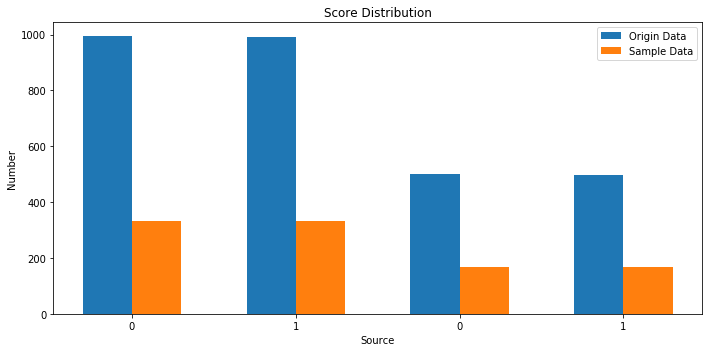

In [17]:
num_groups = len(data_all.score.value_counts())

# data 
origin_data = data_all.score.value_counts().values
sample_data = data_all_sample.score.value_counts().values

# figure setting
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(num_groups)
bar_width = 0.3

# chart plot
rects_origin = ax.bar(index, 
                      origin_data, 
                      bar_width,
                      label='Origin Data')

rects_sample = ax.bar(index+bar_width, 
                      sample_data, 
                      bar_width,
                      label='Sample Data')

# label setting
ax.set_xlabel('Source')
ax.set_ylabel('Number')
ax.set_title('Score Distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_all.score.value_counts().index)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

# show the figure
fig.tight_layout()
plt.show()

#### >>Feature Creation

In [18]:
import nltk

# adding unigram for new feature
data_all['unigrams'] = data_all['text'].apply(lambda x: dmh.tokenize_text(x))
data_all[0:4]

,text,score,source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells,"[Tied, to, charger, for, conversations, lastin..."


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
count_vect = CountVectorizer()
data_all_counts = count_vect.fit_transform(data_all.text)
data_all_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [21]:
data_all_counts.shape

(2983, 5155)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [22]:
import seaborn as sns

num_selected = 40

# set 2 axis array
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:num_selected]]
plot_y = ["doc_"+ str(i) for i in list(data_all.index)[:num_selected]]
plot_z = data_all_counts[:num_selected, :num_selected].toarray()

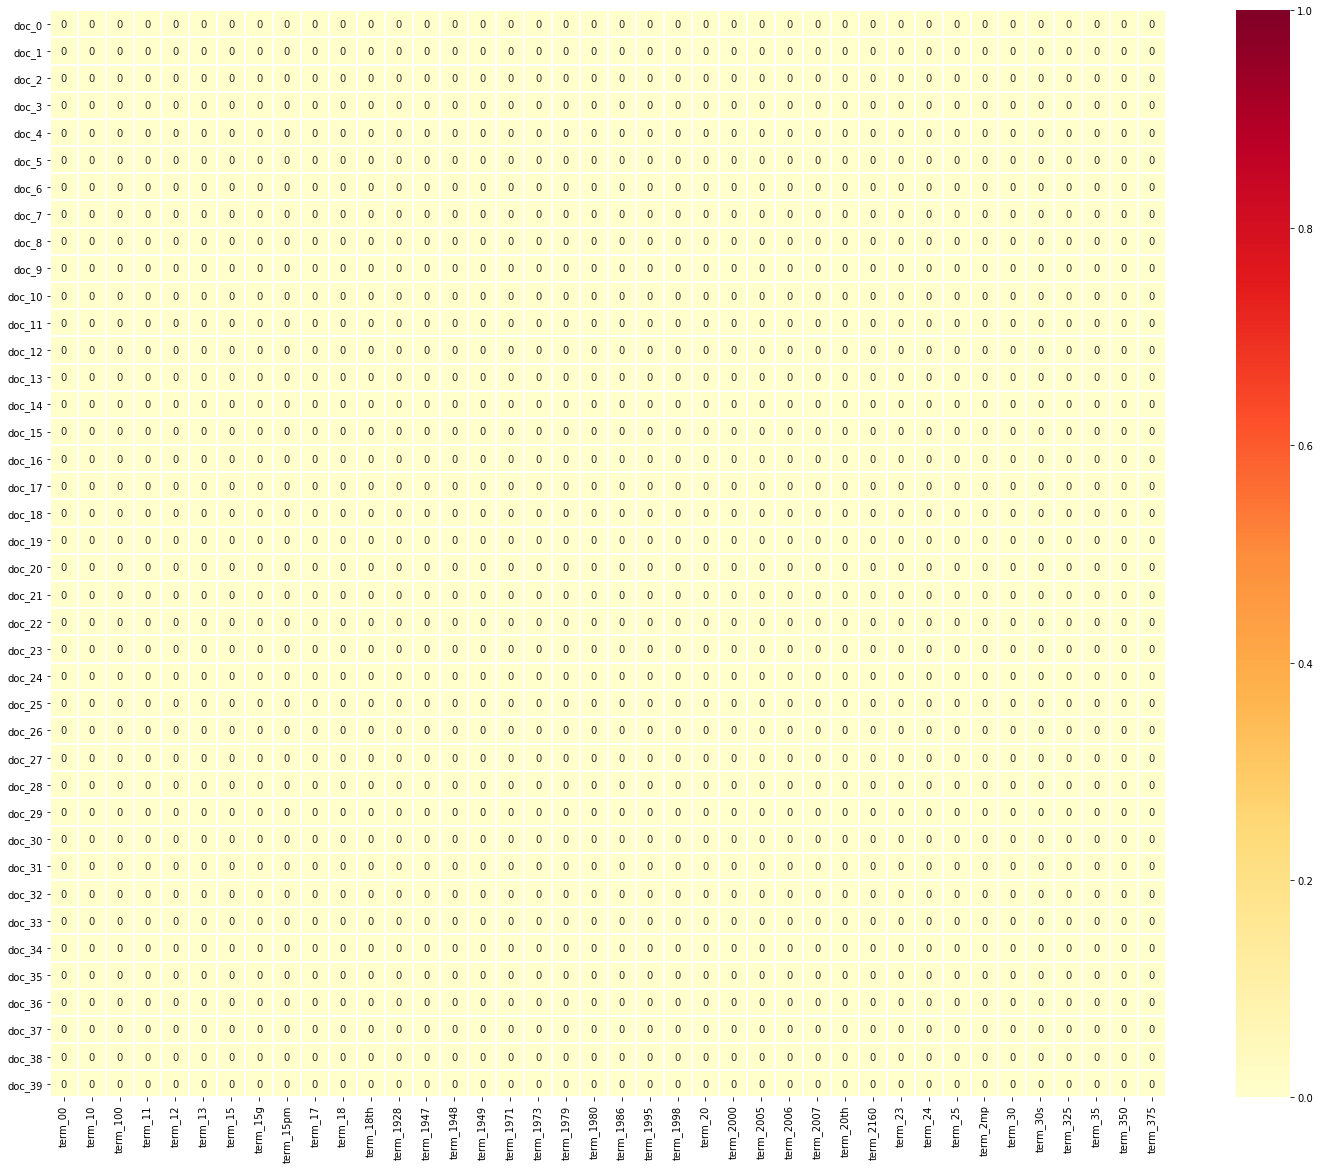

In [23]:
# plot with seaborn
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,20))
ax = sns.heatmap(df_todraw,
                 cmap="YlOrRd",
                 vmin=0, vmax=1, annot=True, linewidths=1)

#### >>Dimensionality Reduction

In [24]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data_all_reduced = PCA(n_components = 2).fit_transform(data_all_counts.toarray())

(2983, 2)

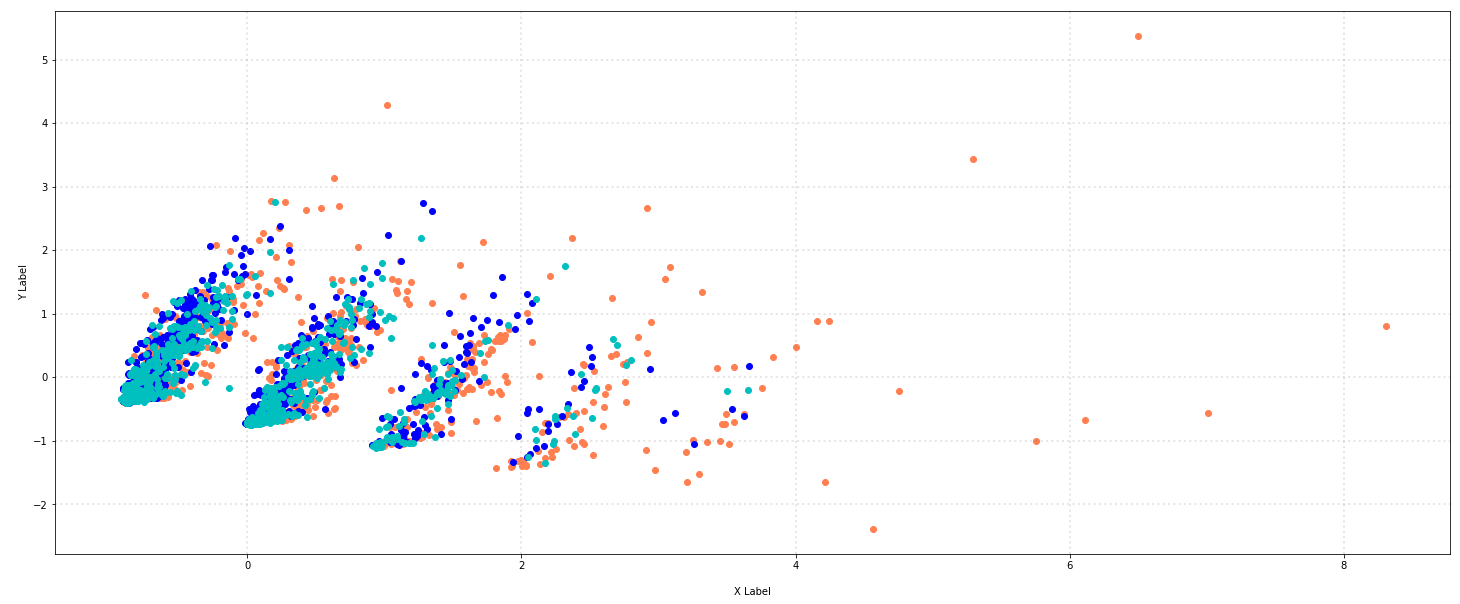

In [25]:
col = ['coral', 'blue', 'c']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, source in zip(col, list_source):
    xs = data_all_reduced[data_all['source'] == source].T[0]
    ys = data_all_reduced[data_all['source'] == source].T[1]
    
    ax.scatter(xs, ys, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [27]:
data_all_reduced = PCA(n_components = 3).fit_transform(data_all_counts.toarray())

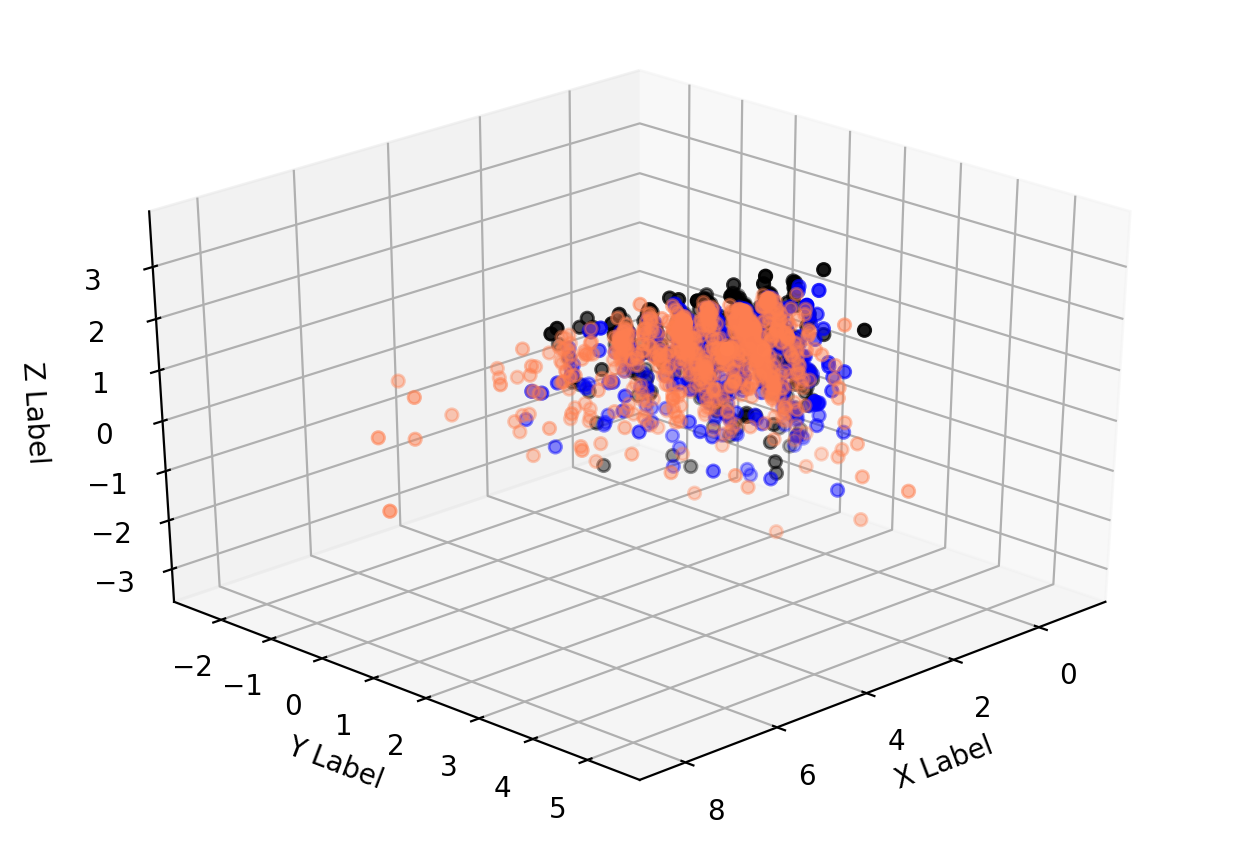

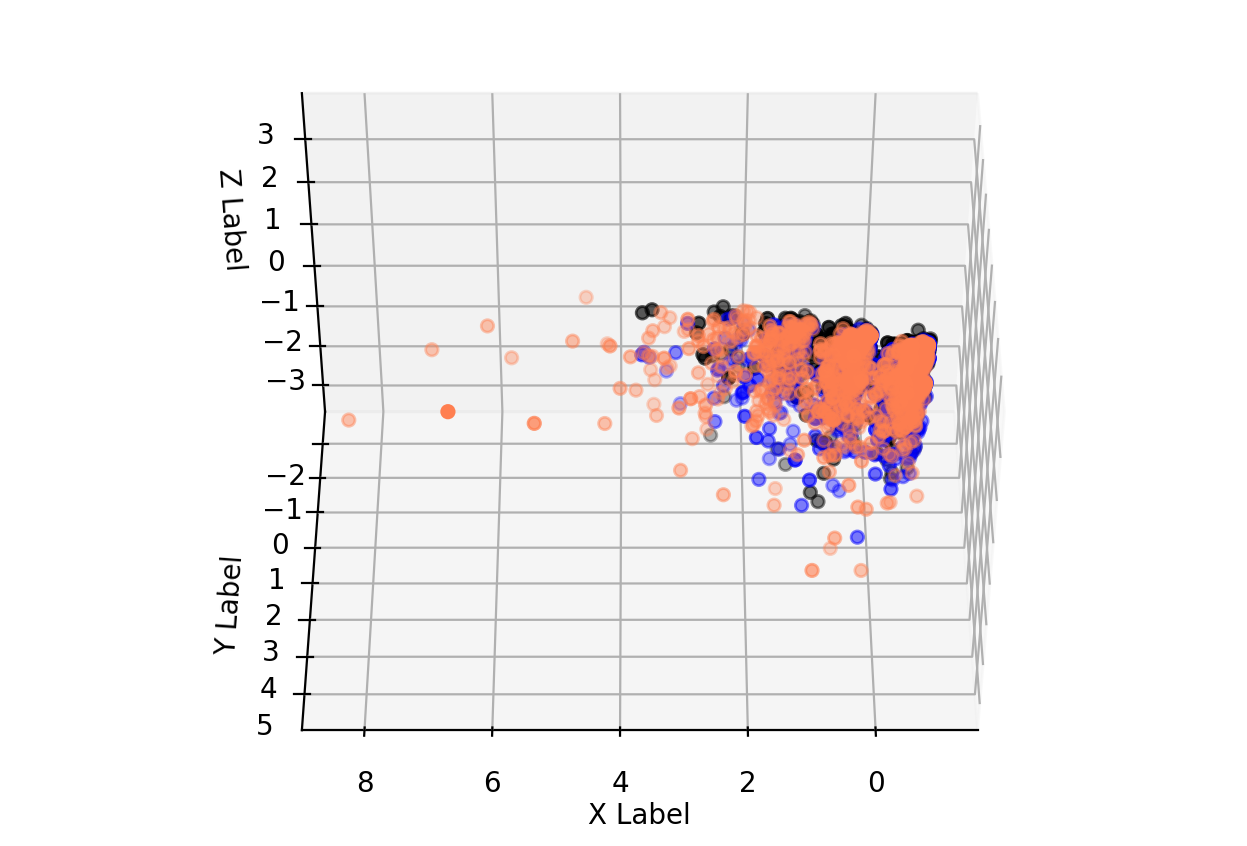

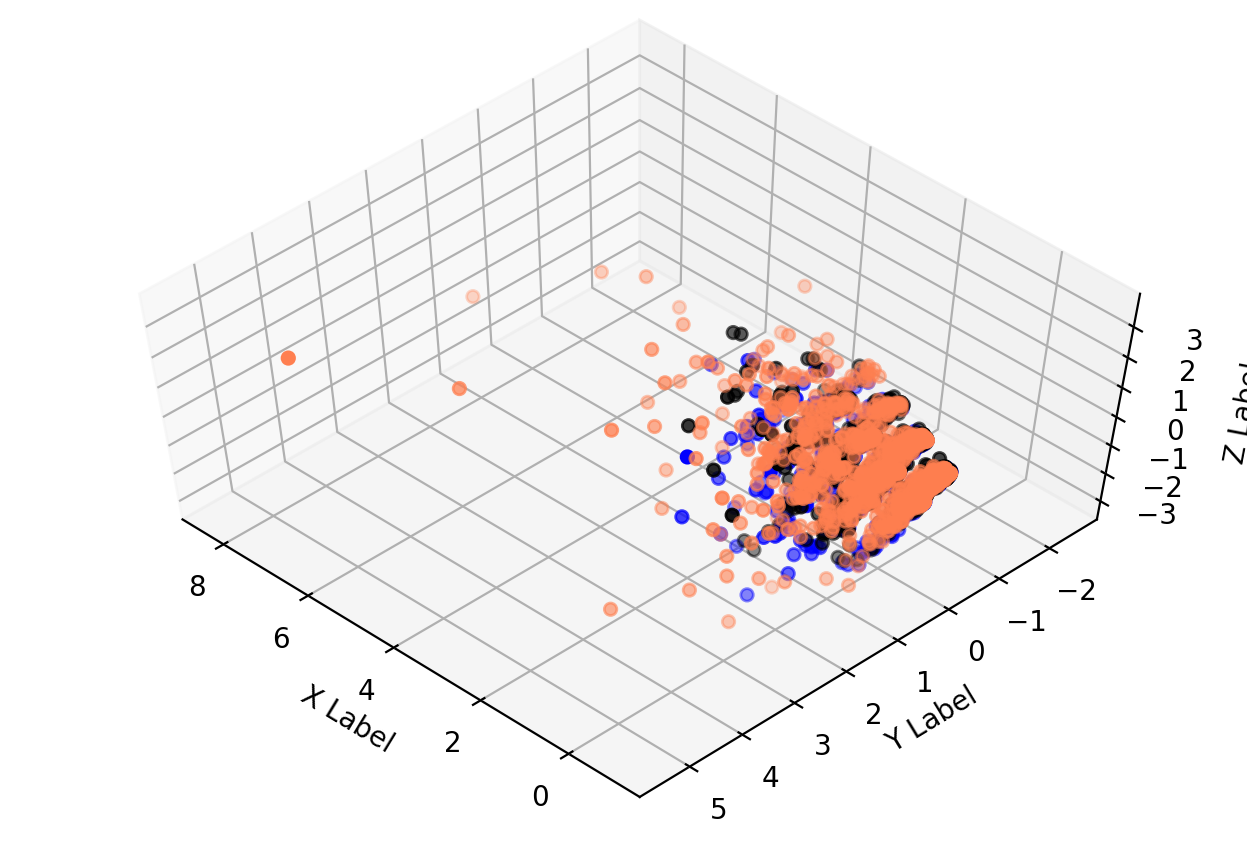

In [32]:
# setting 3 plot figure
fig1 = plt.figure(1, dpi=200)
fig2 = plt.figure(2, dpi=200)
fig3 = plt.figure(3, dpi=200)

# clear plot exists
plt.clf()

# setting 3D Axes for specific elevation and azimuth
ax1 = Axes3D(fig1, elev=30, azim=45)
ax2 = Axes3D(fig2, elev=45, azim=90)
ax3 = Axes3D(fig3, elev=60, azim=135)

# clear axes exist
plt.cla()

# 4 color for 4 categories
col = ['coral', 'blue', 'black', 'm']

# plot 3 figure
for i, source in enumerate(list_source):
    # 3 Axes content
    xs = data_all_reduced[data_all['source'] == source].T[0]
    ys = data_all_reduced[data_all['source'] == source].T[1]
    zs = data_all_reduced[data_all['source'] == source].T[2]
    
    ax1.scatter(xs, ys, zs, color=col[i], marker='o')
    ax2.scatter(xs, ys, zs, color=col[i], marker='o')
    ax3.scatter(xs, ys, zs, color=col[i], marker='o')


# 3 axes labels    
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')

plt.show()

>I found that some data points in some angle are disappear because we observe by the angel which those points are overlapping in.  

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [34]:
import plotly.graph_objects as go
import chart_studio.plotly as cs

from plotly.offline import init_notebook_mode

term_frequencies=np.asarray(data_all_counts.sum(axis=0))[0].tolist()

In [37]:
selected_start = 1000
selected_end = 1300

In [38]:
init_notebook_mode(connected=True)

# sorting by default order
go_figure = go.Figure(
    data=[go.Bar(
        x=count_vect.get_feature_names()[selected_start:selected_end],
        y=term_frequencies[selected_start:selected_end])],
    layout={
        "title": "Frequency of the term",
        "xaxis": {"title": "Term"},
        "yaxis": {"title": "Frequency"}})

go_figure.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [39]:
selected_start = 0
selected_end = 300

In [40]:
# sorting by default order and setting threshold by last number percentage
list_indices_order = np.argsort(term_frequencies)[::-1]
threshold_percentage = 95 # last number percentage of term
threshold_frequency = term_frequencies[list_indices_order[len(list_indices_order)*(100-threshold_percentage)//100]]

term_filter = []
frequecy_filter = []

for idx,term in enumerate(count_vect.get_feature_names()):
    if term_frequencies[idx]>=threshold_frequency and len(term_filter)<300: term_filter.append(term)
        
for frequecy in term_frequencies:
    if frequecy>=threshold_frequency and len(frequecy_filter)<300: frequecy_filter.append(frequecy) 

go_figure = go.Figure(
    data=[go.Bar(
        x=term_filter,
        y=frequecy_filter)],
    layout={
        "title": "Frequency of the term",
        "xaxis": {"title": "Term"},
        "yaxis": {"title": "Frequency"}})

go_figure.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [41]:
selected_start = 0
selected_end = 300

In [42]:
# sorting by term-frequency
list_indices_order = np.argsort(term_frequencies)[::-1]
term_order = [count_vect.get_feature_names()[idx] for order, idx in enumerate(list_indices_order) if order>=selected_start and order<selected_end]
frequencies_order = [term_frequencies[idx] for order, idx in enumerate(list_indices_order) if order>=selected_start and order<selected_end]

go_figure = go.Figure(
    data=[go.Bar(
        x=term_order,
        y=frequencies_order)],
    layout={
        "title": "Frequency of the term",
        "xaxis": {"title": "Term"},
        "yaxis": {"title": "Frequency"}})

go_figure.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [45]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(data_all.source)
data_all['bin_category'] = mlb.transform(data_all.source).tolist()

data_all[0:9]

,text,score,source,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon_cells,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
